In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('/kaggle/input/covid-19-location-and-affect/covid_19_clean_complete.csv')
data

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

# Analysis

In [3]:
data.shape

(49068, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.head()

Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [7]:
data.describe()

Lat          Long                 Date     Confirmed  \
count  49068.000000  49068.000000                49068  4.906800e+04   
mean      21.433730     23.528236  2020-04-24 12:00:00  1.688490e+04   
min      -51.796300   -135.000000  2020-01-22 00:00:00  0.000000e+00   
25%        7.873054    -15.310100  2020-03-08 18:00:00  4.000000e+00   
50%       23.634500     21.745300  2020-04-24 12:00:00  1.680000e+02   
75%       41.204380     80.771797  2020-06-10 06:00:00  1.518250e+03   
max       71.706900    178.065000  2020-07-27 00:00:00  4.290259e+06   
std       24.950320     70.442740                  NaN  1.273002e+05   

              Deaths     Recovered        Active  
count   49068.000000  4.906800e+04  4.906800e+04  
mean      884.179160  7.915713e+03  8.085012e+03  
min         0.000000  0.000000e+00 -1.400000e+01  
25%         0.000000  0.000000e+00  0.000000e+00  
50%         2.000000  2.900000e+01  2.600000e+01  
75%        30.000000  6.660000e+02  6.060000e+02  
max    148011.000000  1.846641e+06  2.816444e+06  
std      6313.584411  5.480092e+04  7.625890e+04

In [8]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [9]:
data.rename(columns = {
    'Province/State' : 'State',
    'Country/Region' : 'Country'}, inplace = True)

In [10]:
data.isnull().sum()

State         34404
Country           0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [11]:
data[data['State'].isnull()==False]

State         Country      Lat      Long  \
8      Australian Capital Territory       Australia -35.4735  149.0124   
9                   New South Wales       Australia -33.8688  151.2093   
10               Northern Territory       Australia -12.4634  130.8456   
11                       Queensland       Australia -27.4698  153.0251   
12                  South Australia       Australia -34.9285  138.6007   
...                             ...             ...      ...       ...   
49052                      Anguilla  United Kingdom  18.2206  -63.0686   
49053        British Virgin Islands  United Kingdom  18.4207  -64.6400   
49054      Turks and Caicos Islands  United Kingdom  21.6940  -71.7979   
49059   Falkland Islands (Malvinas)  United Kingdom -51.7963  -59.5236   
49060     Saint Pierre and Miquelon          France  46.8852  -56.3159   

            Date  Confirmed  Deaths  Recovered  Active       WHO Region  
8     2020-01-22          0       0          0       0  Western Pacific  
9     2020-01-22          0       0          0       0  Western Pacific  
10    2020-01-22          0       0          0       0  Western Pacific  
11    2020-01-22          0       0          0       0  Western Pacific  
12    2020-01-22          0       0          0       0  Western Pacific  
...          ...        ...     ...        ...     ...              ...  
49052 2020-07-27          3       0          3       0           Europe  
49053 2020-07-27          8       1          7       0           Europe  
49054 2020-07-27         99       2         36      61           Europe  
49059 2020-07-27         13       0         13       0           Europe  
49060 2020-07-27          4       0          1       3           Europe  

[14664 rows x 10 columns]

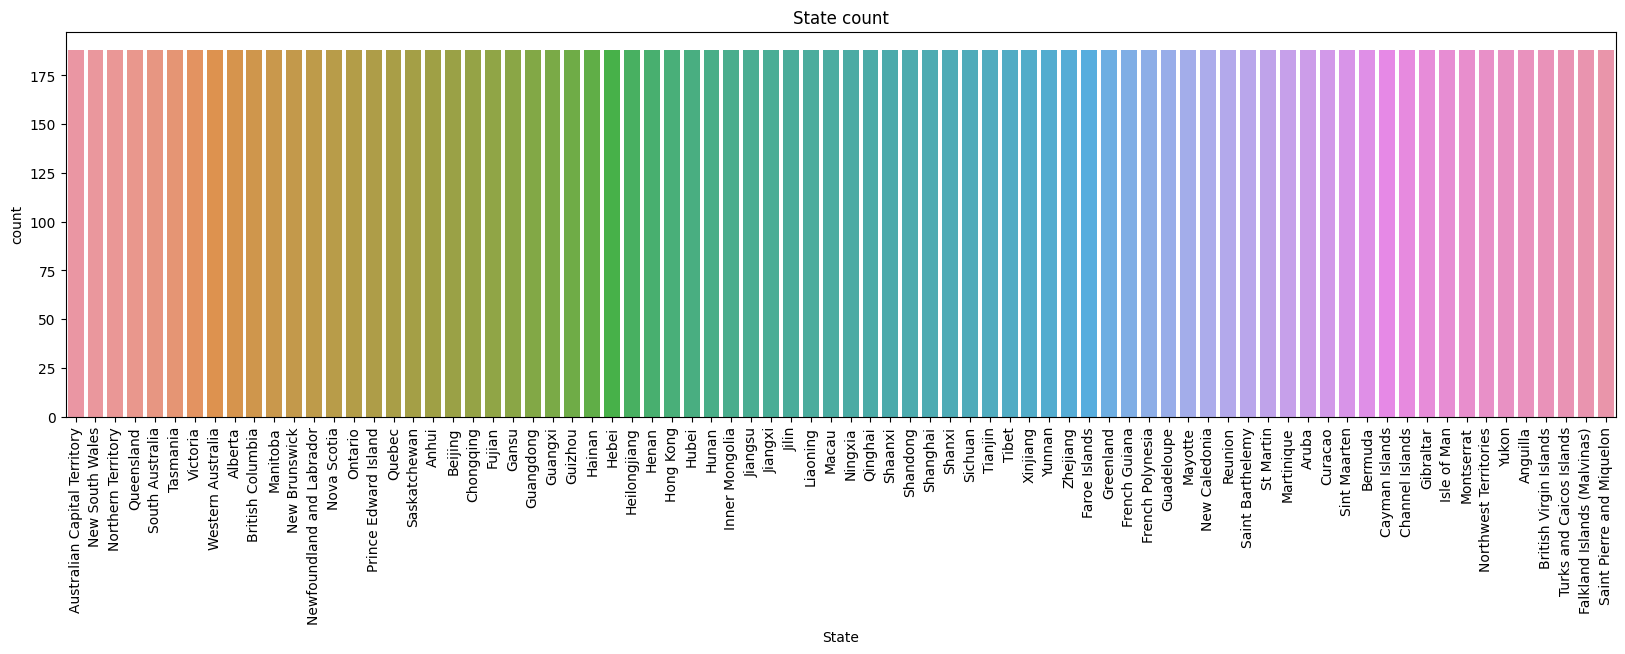

In [12]:
plt.figure(figsize = (20,5))
sns.countplot(data= data, x = 'State')
plt.xticks(rotation = 90)
plt.title('State count')
plt.show()

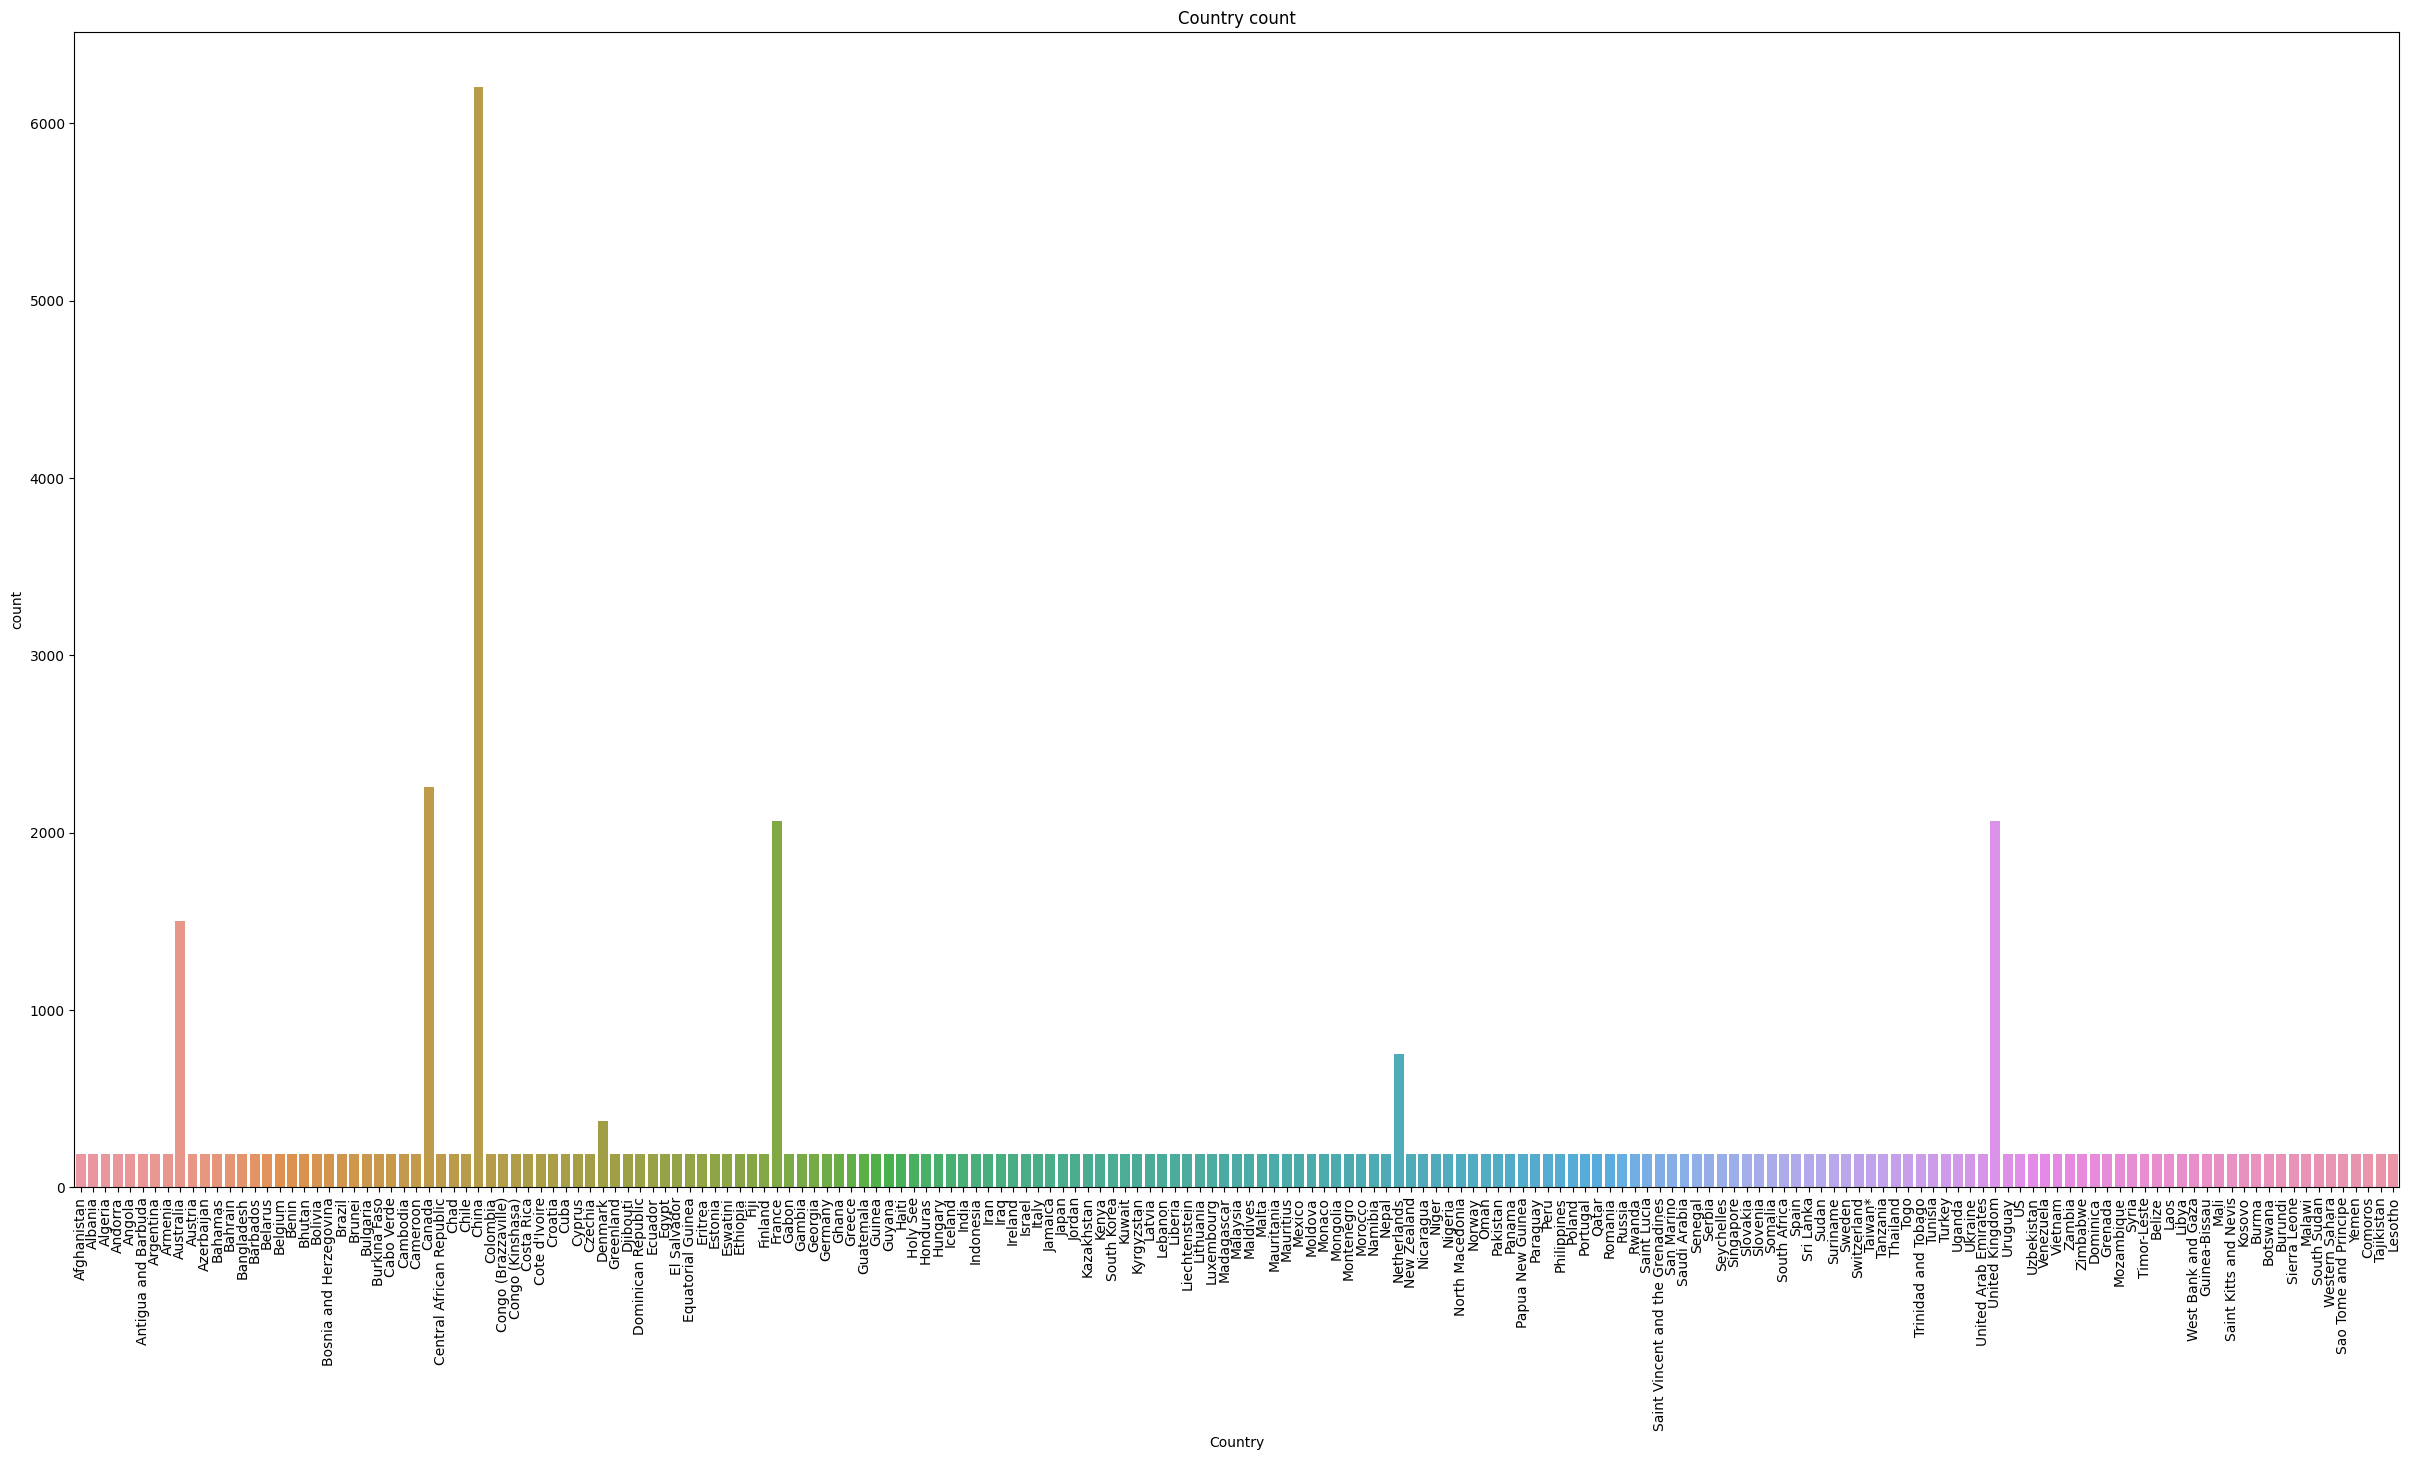

In [13]:
plt.figure(figsize = (30,15))
sns.countplot(data= data, x = 'Country')
plt.xticks(rotation = 90)
plt.title('Country count')
plt.show()

In [14]:
country_stats = data.groupby('Country').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'})
country_stats.reset_index(inplace=True)
country_stats.head()

Country  Confirmed  Deaths  Recovered   Active
0  Afghanistan    1936390   49098     798240  1089052
1      Albania     196702    5708     118877    72117
2      Algeria    1179755   77972     755897   345886
3      Andorra      94404    5423      69074    19907
4       Angola      22662    1078       6573    15011

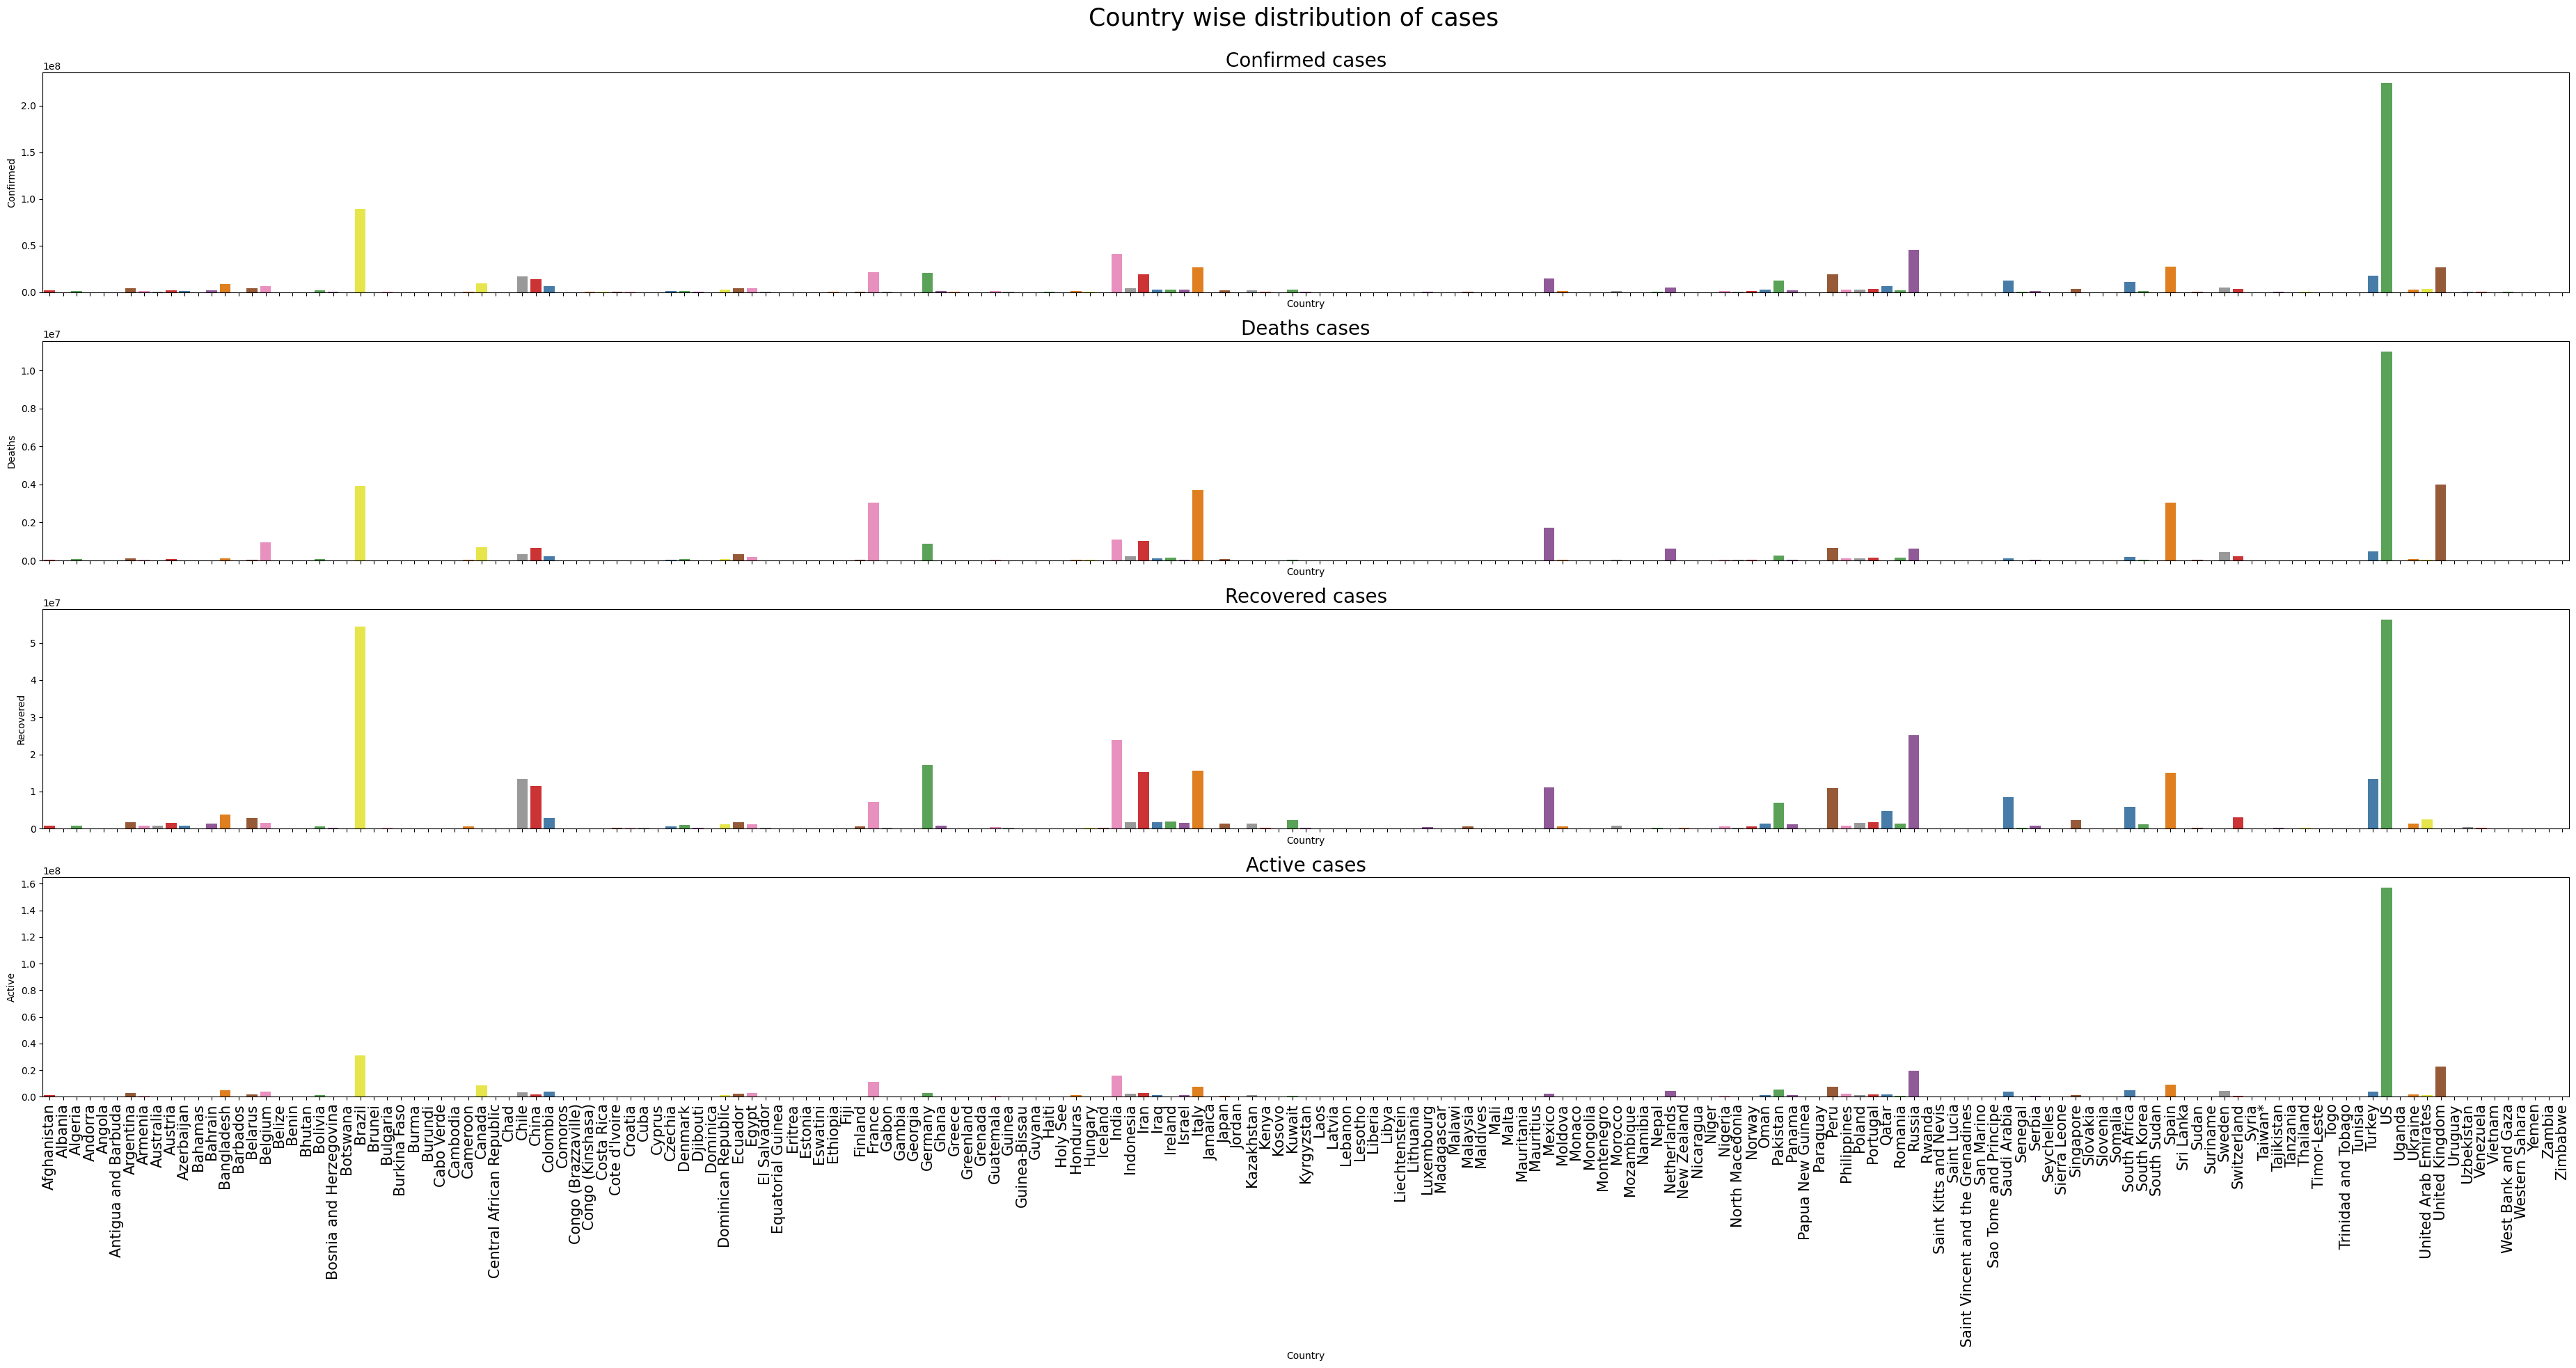

In [15]:
fig, axes = plt.subplots(4,1, figsize = (37,20), sharex = True)
for i in range(1,5):
    sns.barplot(x = country_stats['Country'], y = country_stats[country_stats.columns[i]], palette = sns.color_palette("Set1"), ax = axes[i-1])
    axes[i-1].set_xticklabels(axes[i-1].get_xticklabels(), rotation=90, fontsize = 15)
    axes[i-1].set_title(f'{country_stats.columns[i]} cases', fontsize = 20)

fig.suptitle('Country wise distribution of cases', fontsize = 25)
plt.subplots_adjust(hspace=5)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
    

In [16]:
#last recorded date
data['Date'].max()

Timestamp('2020-07-27 00:00:00')

In [17]:
#Incidents on the last recorded day
last = data[data['Date']==data['Date'].max()]
last.head()

State      Country       Lat       Long       Date  Confirmed  Deaths  \
48807   NaN  Afghanistan  33.93911  67.709953 2020-07-27      36263    1269   
48808   NaN      Albania  41.15330  20.168300 2020-07-27       4880     144   
48809   NaN      Algeria  28.03390   1.659600 2020-07-27      27973    1163   
48810   NaN      Andorra  42.50630   1.521800 2020-07-27        907      52   
48811   NaN       Angola -11.20270  17.873900 2020-07-27        950      41   

       Recovered  Active             WHO Region  
48807      25198    9796  Eastern Mediterranean  
48808       2745    1991                 Europe  
48809      18837    7973                 Africa  
48810        803      52                 Europe  
48811        242     667                 Africa

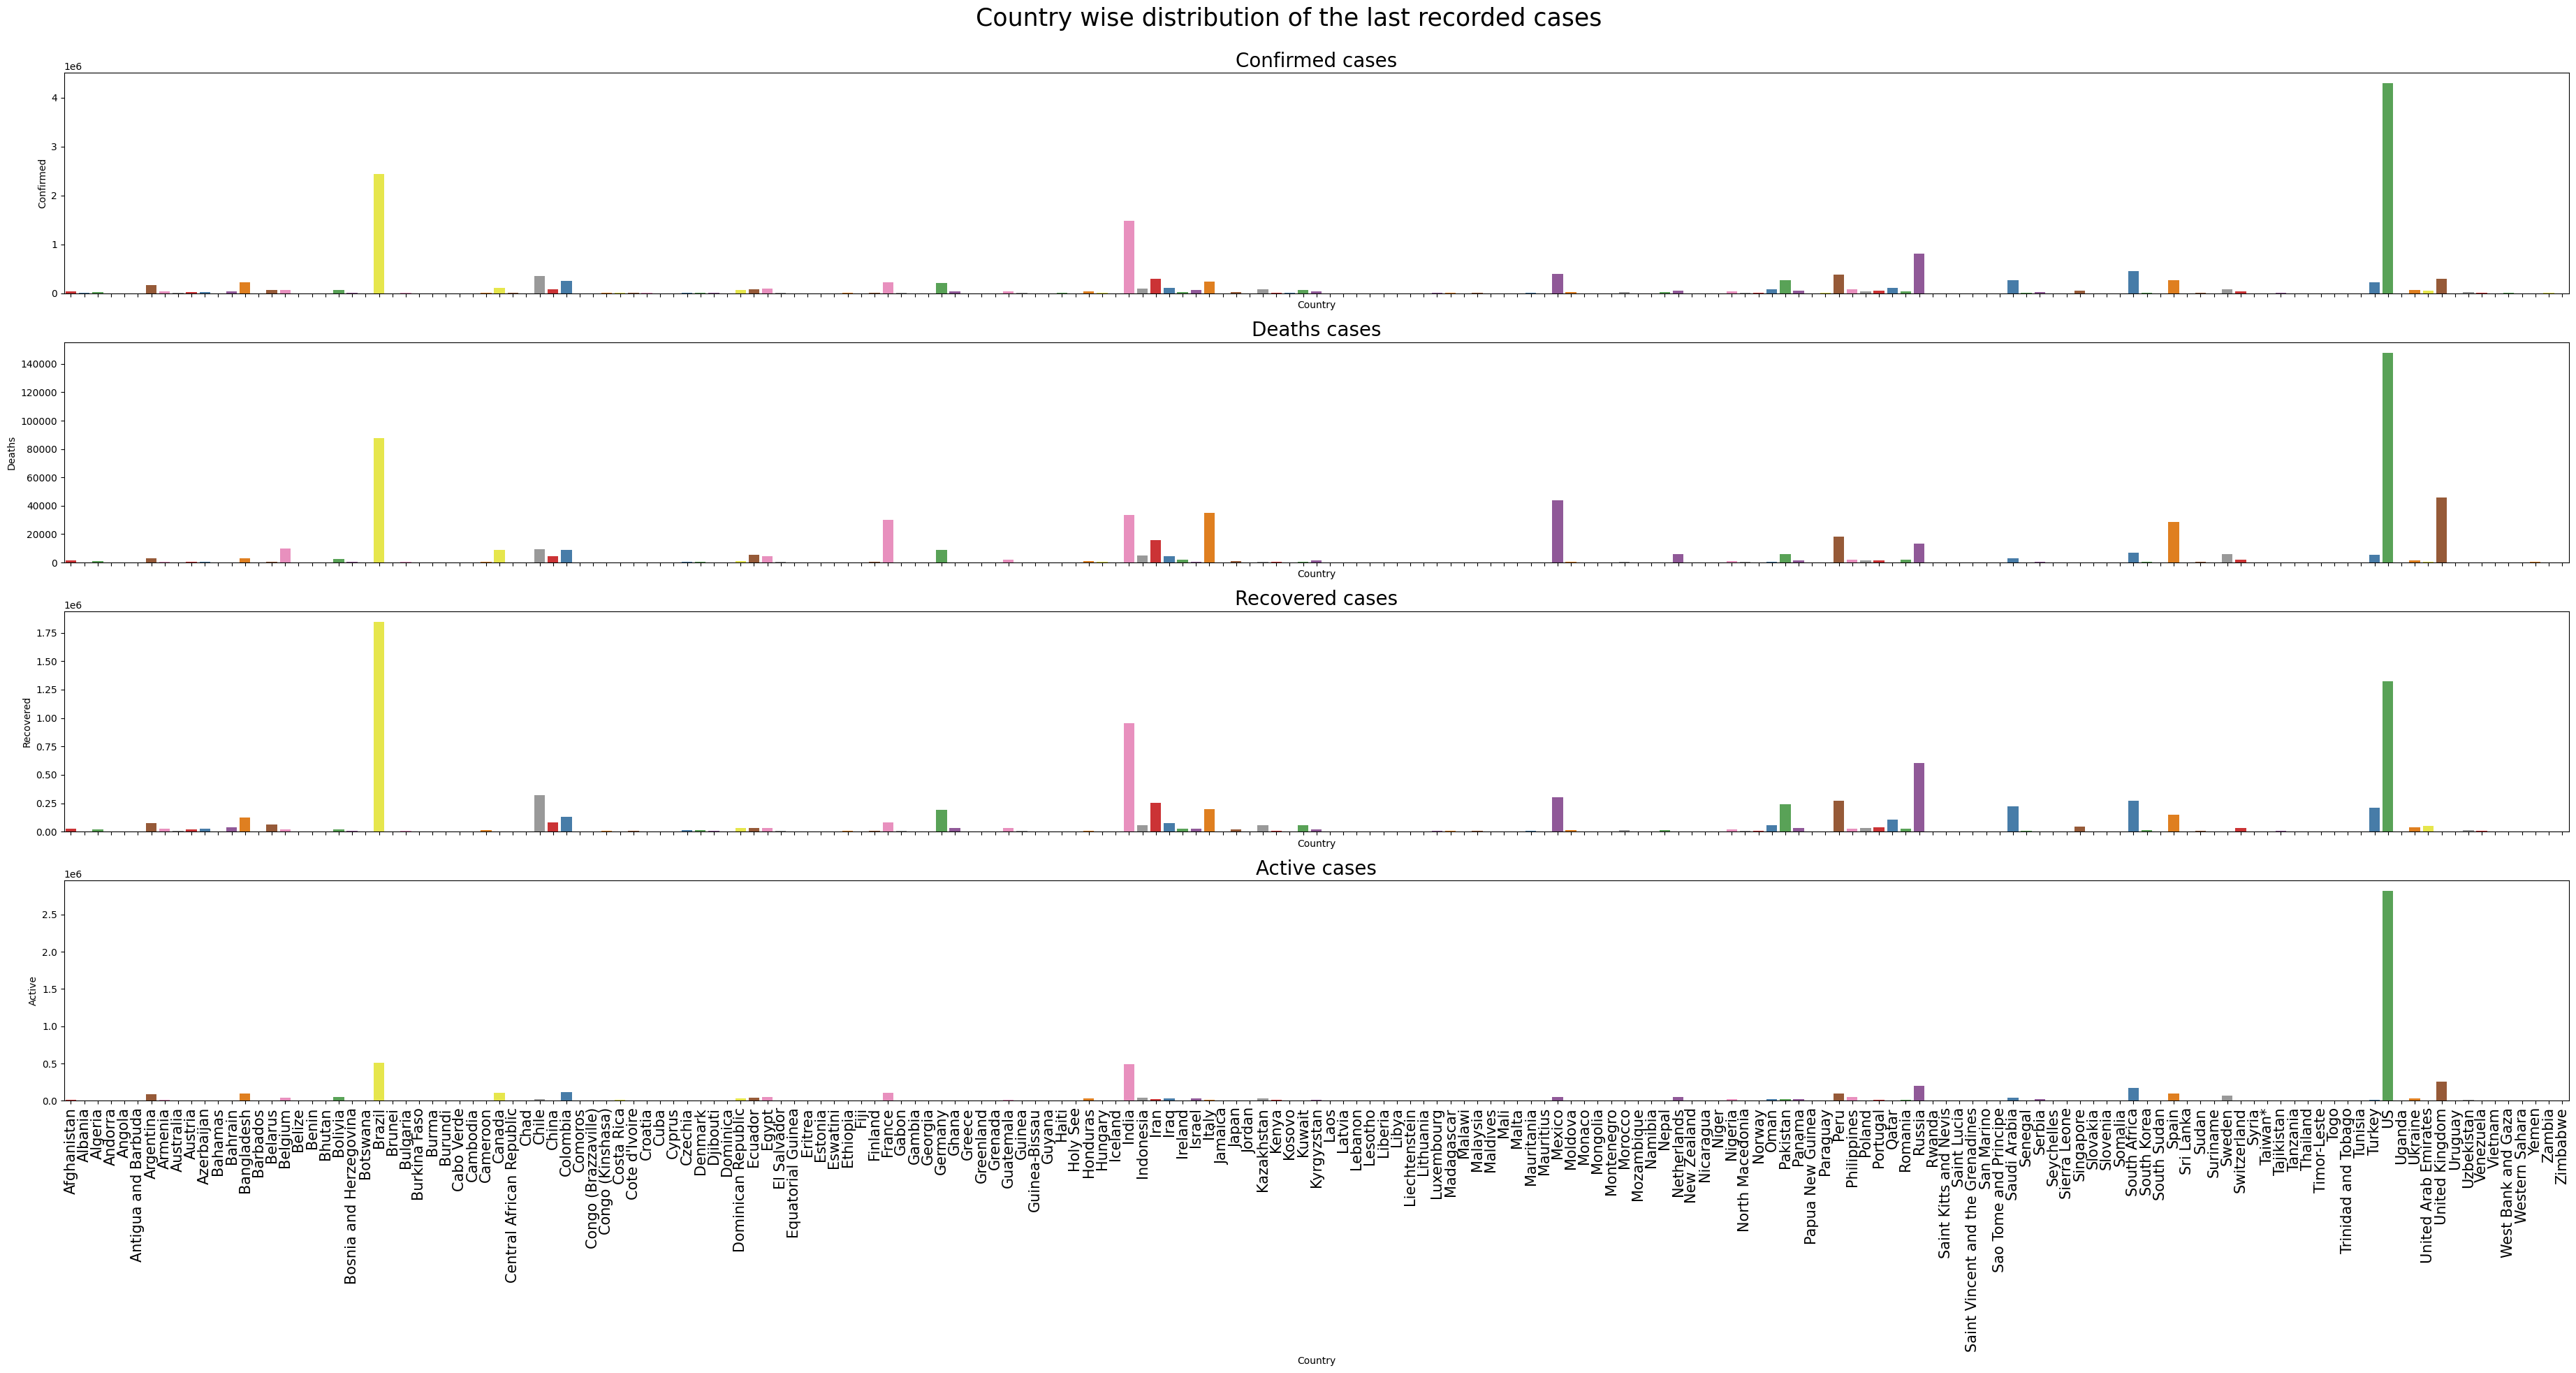

In [18]:
#Country wise distribution on last recorded day
last_count = last.groupby('Country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
fig, axes = plt.subplots(4,1, figsize = (37,20), sharex = True)
for i in range(1,5):
    sns.barplot(x = last_count['Country'], y = last_count[last_count.columns[i]], palette = sns.color_palette("Set1"), ax = axes[i-1])
    axes[i-1].set_xticklabels(axes[i-1].get_xticklabels(), rotation=90, fontsize = 15)
    axes[i-1].set_title(f'{last_count.columns[i]} cases', fontsize = 20)

fig.suptitle('Country wise distribution of the last recorded cases', fontsize = 25)
plt.subplots_adjust(hspace=5)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [41]:
# Top 20 countries with highest active cases on last recorded date
last_count[['Country','Active']].sort_values(by = 'Active', ascending=False).head(20)

Country   Active
173              US  2816444
23           Brazil   508116
79            India   495499
177  United Kingdom   254427
138          Russia   201097
154    South Africa   170537
37         Colombia   117163
61           France   108928
32           Canada   107514
132            Peru    98752
13       Bangladesh    97577
157           Spain    93613
6         Argentina    91782
161          Sweden    73695
133     Philippines    53649
52            Egypt    52992
111          Mexico    47657
120     Netherlands    47064
20          Bolivia    47056
145    Saudi Arabia    43238

In [20]:
fig = px.choropleth (last_count,
                     locations = 'Country',
                     locationmode = 'country names',
                     hover_name= 'Country' ,
                     color = 'Active',
                     title = 'Last recorded Active cases in World',
                     range_color = [1000,2000000],
                     color_continuous_scale = 'speed')
fig.show()

In [43]:
# Top 20 countries with highest deaths on last recorded date
last_count[['Country','Deaths']].sort_values(by = 'Deaths', ascending=False).head(20)

Country  Deaths
173              US  148011
23           Brazil   87618
177  United Kingdom   45844
111          Mexico   44022
85            Italy   35112
79            India   33408
61           France   30212
157           Spain   28432
132            Peru   18418
81             Iran   15912
138          Russia   13334
16          Belgium    9822
35            Chile    9187
65          Germany    9125
32           Canada    8944
37         Colombia    8777
154    South Africa    7067
120     Netherlands    6160
128        Pakistan    5842
161          Sweden    5700

In [22]:
fig = px.choropleth (last_count,
                     locations = 'Country',
                     locationmode = 'country names',
                     hover_name= 'Country' ,
                     color = 'Deaths',
                     title = 'Last recorded Death toll in World',
                     range_color = [100,150000],
                     color_continuous_scale = 'inferno_r')
fig.show()

In [23]:
#Overall maximum deaths recorded worldwide
country_stats['Deaths'].max()

11011411

In [24]:
fig = px.choropleth (country_stats,
                     locations = 'Country',
                     locationmode = 'country names',
                     hover_name= 'Country' ,
                     color = 'Deaths',
                     title = 'Overall Death toll in World',
                     range_color = [1000,12000000],
                     color_continuous_scale = 'inferno_r')
fig.show()

In [25]:
#Maximum death recorded in a particular date
data['Deaths'].max()

148011

In [26]:
fig = px.choropleth (data,
                     locations = 'Country',
                     locationmode = 'country names',
                     hover_name= 'Country' ,
                     color = 'Deaths',
                     title = 'Day wise Death toll in World',
                     range_color = [1,150000],
                     color_continuous_scale = 'inferno_r',
                     animation_frame='Date')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [27]:
#Overall maximum confirm cases recorded worldwide
country_stats['Confirmed'].max()

224345948

In [28]:
fig = px.choropleth (country_stats,
                     locations = 'Country',
                     locationmode = 'country names',
                     hover_name= 'Country' ,
                     color = 'Confirmed',
                     title = 'Overall confirmed cases in World',
                     range_color = [1,230000000],
                     color_continuous_scale = 'orrd')
fig.show()

In [29]:
#Maximum confirmed cases recorded in a particular date
data['Confirmed'].max()

4290259

In [30]:
fig = px.choropleth (data,
                     locations = 'Country',
                     locationmode = 'country names',
                     hover_name= 'Country' ,
                     color = 'Confirmed',
                     title = 'Day wise confirmed cases in World',
                     range_color = [1,4500000],
                     color_continuous_scale = 'orrd',
                     animation_frame='Date')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [31]:
#Maximum recovered cases recorded in a particular date
country_stats['Recovered'].max()

56353416

In [32]:
fig = px.choropleth (country_stats,
                     locations = 'Country',
                     locationmode = 'country names',
                     hover_name= 'Country' ,
                     color = 'Confirmed',
                     title = 'Overall recovered cases in World',
                     range_color = [1,57000000],
                     color_continuous_scale = 'greens')
fig.show()

# Trend analysis

In [33]:
#trend in confirmed cases daywise
confirmed_case = data.groupby('Date')['Confirmed'].agg('sum').reset_index()
confirmed_case

Date  Confirmed
0   2020-01-22        555
1   2020-01-23        654
2   2020-01-24        941
3   2020-01-25       1434
4   2020-01-26       2118
..         ...        ...
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

[188 rows x 2 columns]

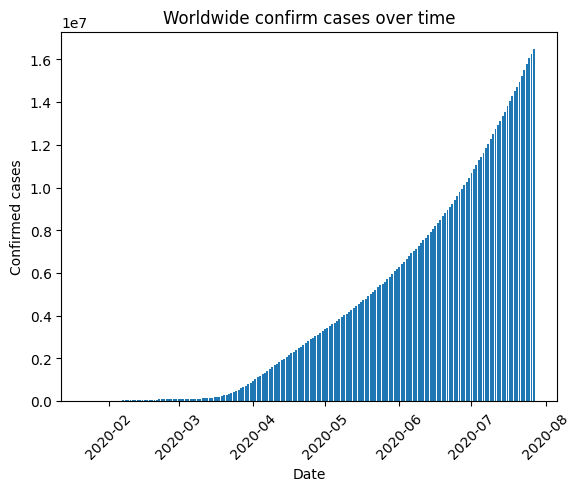

In [34]:
plt.bar(confirmed_case['Date'],confirmed_case['Confirmed'])
plt.xlabel('Date')
plt.ylabel('Confirmed cases')
plt.xticks(rotation = 45)
plt.title('Worldwide confirm cases over time')
plt.show()

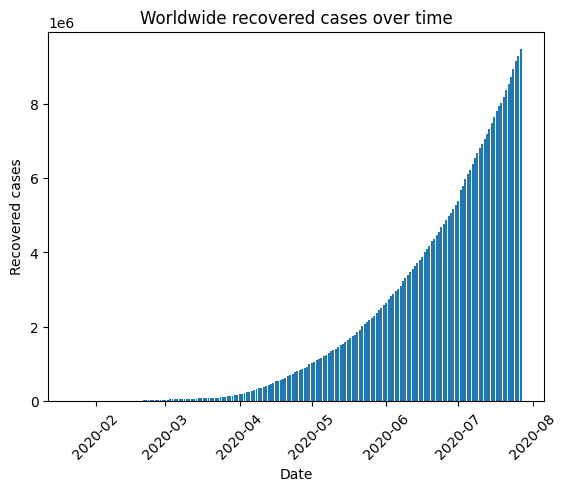

In [35]:
#trend in recovered cases daywise
recovered_case = data.groupby('Date')['Recovered'].agg('sum').reset_index()
plt.bar(recovered_case['Date'],recovered_case['Recovered'])
plt.xlabel('Date')
plt.ylabel('Recovered cases')
plt.xticks(rotation = 45)
plt.title('Worldwide recovered cases over time')
plt.show()

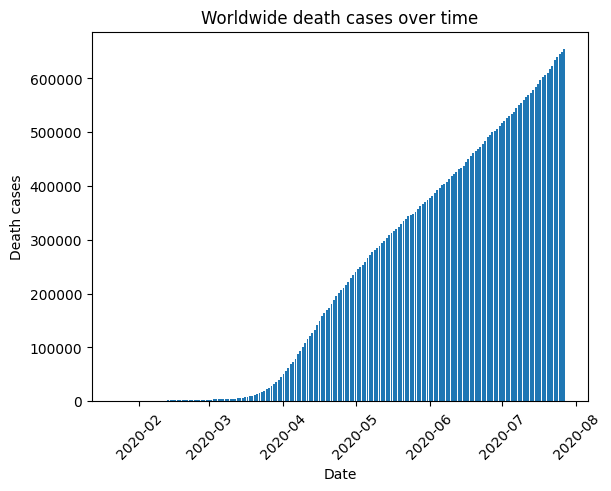

In [36]:
#trend in death cases daywise
death_case = data.groupby('Date')['Deaths'].agg('sum').reset_index()
plt.bar(death_case['Date'],death_case['Deaths'])
plt.xlabel('Date')
plt.ylabel('Death cases')
plt.xticks(rotation = 45)
plt.title('Worldwide death cases over time')
plt.show()

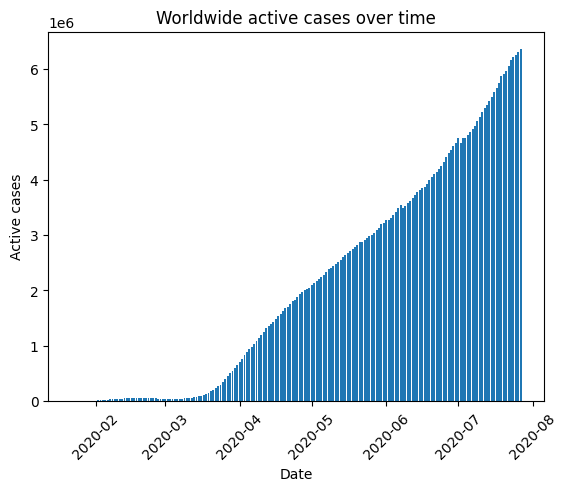

In [44]:
#trend in active cases daywise
death_case = data.groupby('Date')['Active'].agg('sum').reset_index()
plt.bar(death_case['Date'],death_case['Active'])
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.xticks(rotation = 45)
plt.title('Worldwide active cases over time')
plt.show()

# Time series fitting and forecasting

In [ ]:
#FBProphet (Forecast model)
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
#Date wise confirmed, recovered and death cases
confirmed = data.groupby('Date')['Confirmed'].agg('sum').reset_index()
recovered = data.groupby('Date')['Recovered'].agg('sum').reset_index()
death = data.groupby('Date')['Deaths'].agg('sum').reset_index()

In [ ]:
confirmed.head()

In [ ]:
recovered.head()

In [ ]:
death.head()

In [ ]:
#changing column names and dtype to fit the model
confirmed.columns = ['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])
recovered.columns = ['ds','y']
recovered['ds']=pd.to_datetime(recovered['ds'])
death.columns = ['ds','y']
death['ds']=pd.to_datetime(death['ds'])

In [ ]:
#creating model for confirm cases
model_confirmcase = Prophet(interval_width=0.95)

In [ ]:
#fitting the model for confirmed cases
model_confirmcase.fit(confirmed)

In [ ]:
#creating future dates for prediction of next 180 days
future = model_confirmcase.make_future_dataframe(periods=180,freq='D')
future

In [ ]:
forecast_confirmcase = model_confirmcase.predict(future)
forecast_confirmcase

In [ ]:
#Converting to integer type for plotting
forecast_confirmcase[['yhat','yhat_lower','yhat_upper']] = forecast_confirmcase[['yhat','yhat_lower','yhat_upper']].astype(int)
forecast_confirmcase

In [ ]:
#ploting prediction for confirmed cases
confirm_plot = model_confirmcase.plot(forecast_confirmcase)
plt.xlabel("Day")
plt.ylabel('Confirm cases')
plt.title('Forecasting of confirmed cases worldwide')
plt.show()

In [ ]:
#ploting yearly and weekly trends for confirmed cases
confirm_plot_components = model_confirmcase.plot_components(forecast_confirmcase)

In [ ]:
#creating model for active cases
model_recovercase = Prophet(interval_width = 0.95)

In [ ]:
#fitting the model for active cases
model_recovercase.fit(recovered)

In [ ]:
#forecasting and ploting for recover cases for next 180 days
forecast_recovercase = model_recovercase.predict(future)
recover_plot = model_recovercase.plot(forecast_recovercase)
plt.xlabel("Day")
plt.ylabel('Recovered cases')
plt.title('Forecasting of recovered cases worldwide')
plt.show()

In [ ]:
#ploting yearly and weekly trends for recovered cases
recover_components = model_recovercase.plot_components(forecast_recovercase)

In [ ]:
#creating and fitting model for death cases. Forecasting for next 180 days
model_deathcase = Prophet(interval_width = 0.95)
model_deathcase.fit(death)
forecast_deathcase = model_deathcase.predict(future)
forecast_deathcase

In [ ]:
#  ploting forecast for death cases
death_plot = model_deathcase.plot(forecast_deathcase)
plt.xlabel("Day")
plt.ylabel('Number of Death cases')
plt.title('Forecasting of death cases worldwide')
plt.show()

In [ ]:
#ploting components for death cases
death_plot_components = model_deathcase.plot_components(forecast_deathcase)

In [ ]:
#creating dataset for recovered to death ratio
recovered_death_ratio = data.groupby('Date')[['Recovered','Deaths']].sum().reset_index()
recovered_death_ratio

In [ ]:
recovered_death_ratio['R/D ratio'] = recovered_death_ratio['Recovered']/recovered_death_ratio['Deaths']
recovered_death_ratio.drop(['Recovered','Deaths'],axis=1,inplace=True)
recovered_death_ratio

In [ ]:
plt.bar(recovered_death_ratio['Date'], recovered_death_ratio['R/D ratio'])
plt.xlabel('Date')
plt.ylabel('Recovered to Death ratio')
plt.xticks(rotation = 45)
plt.title('Recovered to Death ratio daywise')
plt.show()

In [ ]:
# Converting column name and data type to fit model
recovered_death_ratio.columns = ['ds','y']
recovered_death_ratio['ds'] = pd.to_datetime(recovered_death_ratio['ds'])
recovered_death_ratio

In [ ]:
#xreating and fitting the model for RD ratio.
model_RDratio = Prophet(interval_width = 0.95)
model_RDratio.fit(recovered_death_ratio)

In [ ]:
# Forecasting the ratio for next 360 days
future_RD = model_RDratio.make_future_dataframe(periods=360,freq='D')
forecast_RDratio = model_RDratio.predict(future_RD)
forecast_RDratio

In [ ]:
# Ploting the forecast for RD ratio
RDratio_plot = model_RDratio.plot(forecast_RDratio)
plt.xlabel("Day")
plt.ylabel('Recovered to Death ratio')
plt.title('Forecasting of Recovered to Death ratio worldwide')
plt.show()

In [ ]:
#Ploting components for RD ratio
RDratio_plot_components = model_RDratio.plot_components(forecast_RDratio)